# Lecture 4 Notebook 5: Histograms and Distributions

**Learning Objectives:**
- Understand what histograms show and when to use them
- Create histograms with matplotlib
- Overlay multiple histograms for comparison
- Use density plots (KDE) for smooth distributions
- Visualize distributions of entire datasets

---

## 1. Introduction to Histograms

A **histogram** is a visualization that shows the distribution of numerical data:

- **X-axis**: The range of values, divided into bins
- **Y-axis**: The count (or frequency) of observations in each bin
- **Purpose**: Understand the shape, spread, and central tendency of your data

Histograms help answer questions like:
- What's the typical range of gene expression values?
- Is the data normally distributed or skewed?
- Are there outliers or multiple peaks?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load Gene Expression Data

Let's load the DepMap gene expression dataset that we've been working with:

In [ ]:
# Load the gene expression data
url = "https://zenodo.org/records/17377786/files/expression_filtered.csv?download=1"
gene_df = pd.read_csv(url)

# Display basic info
print(f"Dataset shape: {gene_df.shape}")
print(f"Number of cell lines: {gene_df.shape[0]}")
print(f"Number of genes: {gene_df.shape[1] - 9}")  # Subtract metadata columns
gene_df.head()

---

## 3. Single Histogram: BRCA1 Expression

Let's create our first histogram showing the distribution of BRCA1 expression across all cell lines:

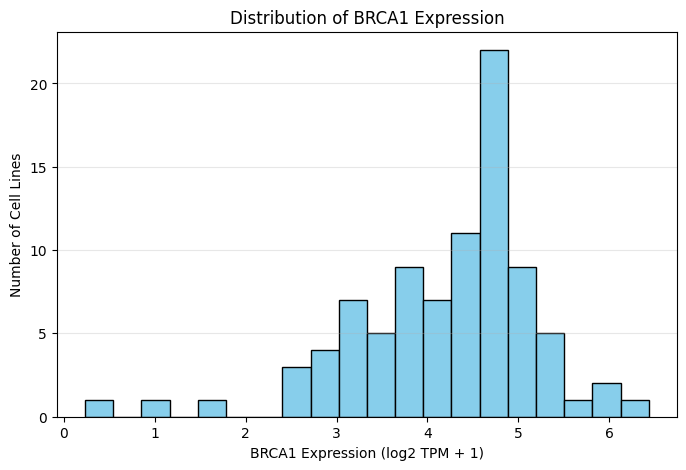

In [3]:
# Create a histogram of BRCA1 expression
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(gene_df['BRCA1'], bins=20, color='skyblue', edgecolor='black')
ax.set_xlabel('BRCA1 Expression (log2 TPM + 1)')
ax.set_ylabel('Number of Cell Lines')
ax.set_title('Distribution of BRCA1 Expression')
ax.grid(axis='y', alpha=0.3)
plt.show()

**What do we see?**
- Most cell lines have BRCA1 expression between 3-5 (log2 scale)
- The distribution shows where the majority of values fall
- We can see if there are any extreme outliers

**Key parameters:**
- `bins`: Number of bars (try changing this!)
- `color`: Color of the bars
- `edgecolor`: Color of bar borders

**The fig, ax API:**
- `fig, ax = plt.subplots()`: Creates a figure and axes object
- `ax.hist()`: Plots the histogram on the axes
- `ax.set_xlabel()`, `ax.set_ylabel()`, `ax.set_title()`: Set labels and title

### 📊 Exercise 1: Histogram of TP53 Expression

Create a histogram showing the distribution of TP53 expression. Use:
- 25 bins
- A different color (e.g., 'lightcoral')
- Appropriate labels and title

**Hint:** Copy the code above and modify it for TP53. Remember to use `fig, ax = plt.subplots()` and `ax.hist()`

In [ ]:
# Your code here:


### 📊 Exercise 2: Different Number of Bins

Create three histograms of MYC expression side-by-side with different numbers of bins (10, 20, and 50).

**Hint:** Use `fig, axes = plt.subplots(1, 3, figsize=(15, 4))` to create multiple plots, then use `axes[0]`, `axes[1]`, `axes[2]`

In [ ]:
# Your code here:


---

## 4. Overlaying Histograms: Compare BRCA1 and TP53

Often we want to compare distributions of multiple variables. We can overlay histograms to see differences:

In [ ]:
# Overlay histograms for BRCA1 and TP53
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(gene_df['BRCA1'], bins=20, alpha=0.5, label='BRCA1', color='skyblue', edgecolor='black')
ax.hist(gene_df['TP53'], bins=20, alpha=0.5, label='TP53', color='lightcoral', edgecolor='black')
ax.set_xlabel('Gene Expression (log2 TPM + 1)')
ax.set_ylabel('Number of Cell Lines')
ax.set_title('Distribution Comparison: BRCA1 vs TP53')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.show()

**What's new?**
- `alpha=0.5`: Makes bars semi-transparent so we can see overlap
- `label`: Creates labels for the legend
- `ax.legend()`: Displays the legend

**Biological question:** How do the expression patterns of these two tumor suppressor genes compare?

### 📊 Exercise 3: Compare Three Genes

Create an overlaid histogram comparing BRCA1, TP53, and MYC. Use three different colors and appropriate transparency.

**Hint:** Add a third `ax.hist()` call with a different color

In [ ]:
# Your code here:


### 📊 Exercise 4: Compare Cancer Types

Create overlaid histograms comparing BRCA1 expression in Breast vs Myeloid cancer cell lines.

**Hint:** Use boolean indexing:
```python
breast_brca1 = gene_df[gene_df['oncotree_lineage'] == 'Breast']['BRCA1']
myeloid_brca1 = gene_df[gene_df['oncotree_lineage'] == 'Myeloid']['BRCA1']
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(breast_brca1, bins=20, alpha=0.5, label='Breast', ...)
```

In [ ]:
# Your code here:


## 5. using pandas directly for plotting

As usual there are differnet ways to do the same thing in python.
An important alternative to matplotlib is to use pandas driectly for plotting.
This works with df[col].plot(kind="hist", ax=ax), you can use other config parameters as in the matplotlib ax.hist() method.
with type you have differnet options:

```python
df.plot(kind='line')      # default, line plot
df.plot(kind='bar')       # vertical bar chart
df.plot(kind='barh')      # horizontal bar chart
df.plot(kind='hist')      # histogram
df.plot(kind='box')       # box plot
df.plot(kind='kde')       # kernel density estimation
df.plot(kind='density')   # alias for 'kde'
df.plot(kind='area')      # area plot
df.plot(kind='pie')       # pie chart
df.plot(kind='scatter')   # scatter plot (requires x= and y=)
df.plot(kind='hexbin')    # hexagonal bin plot (requires x= and y=)
```
the ax paramter tells pandas where to draw the plot.

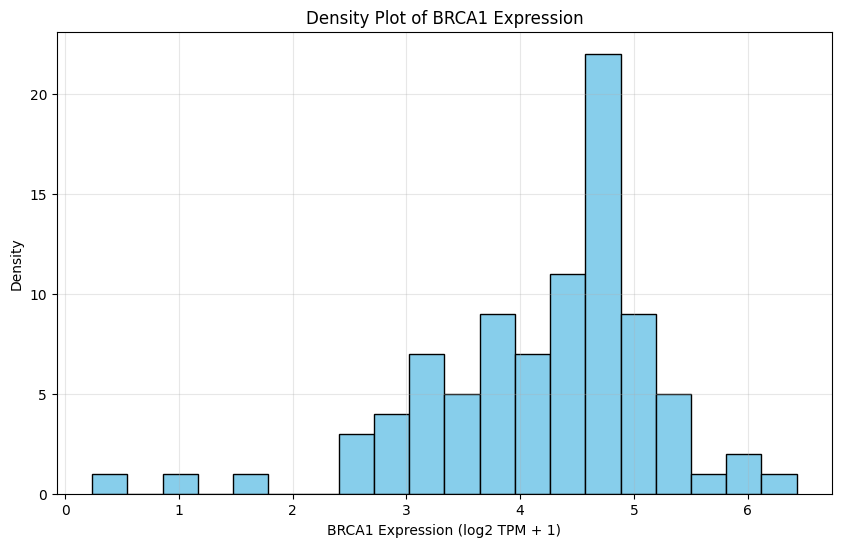

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
gene_df["BRCA1"].plot(kind="hist", bins=20, color="skyblue", edgecolor="black", ax=ax)
ax.set_xlabel("BRCA1 Expression (log2 TPM + 1)")
ax.set_ylabel("Density")
ax.set_title("Density Plot of BRCA1 Expression")
ax.grid(alpha=0.3)
plt.show()


### 📊 Exercise 5: Use the pandas way of generating plots

Choose any gene from the dataset and create a histogram plot driectly from pandas.

### Density Plots (KDE): Smooth Distributions

**Kernel Density Estimation (KDE)** creates a smooth curve representing the distribution. It's like a smoothed histogram!

**Advantages:**
- Shows the overall shape more clearly
- Better for comparing multiple distributions
- Not affected by bin width choices

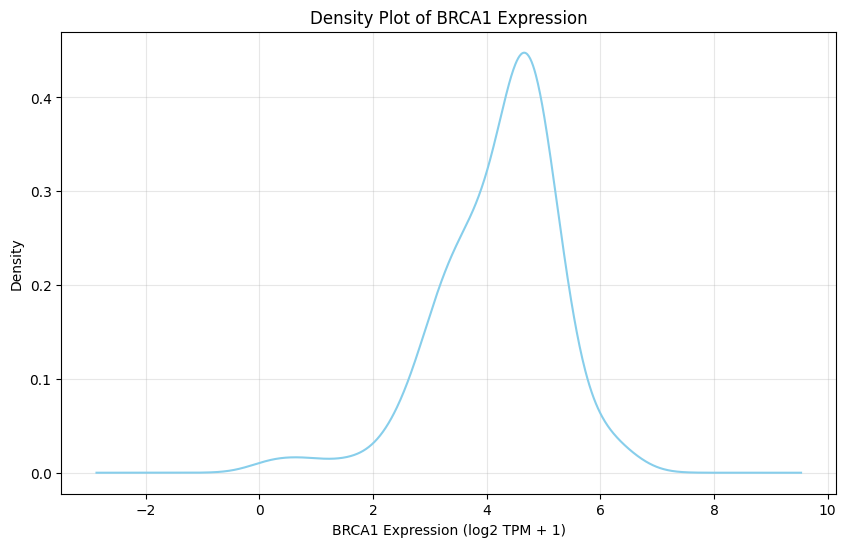

In [18]:
# Create a density plot for BRCA1
fig, ax = plt.subplots(figsize=(10, 6))
gene_df["BRCA1"].plot(kind="density", color="skyblue", ax=ax)
ax.set_xlabel("BRCA1 Expression (log2 TPM + 1)")
ax.set_ylabel("Density")
ax.set_title("Density Plot of BRCA1 Expression")
ax.grid(alpha=0.3)
plt.show()


---



**Interpretation:**
- The peak shows the most common expression level
- The width shows how spread out the data is
- The area under the curve equals 1 (it's a probability distribution)

### Overlay Multiple Density Plots

Density plots are especially nice for comparing distributions:

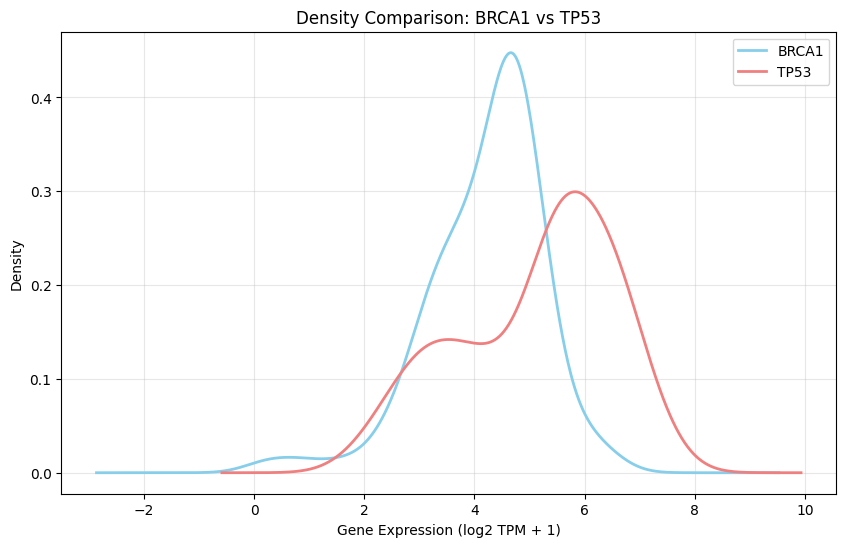

In [20]:
# Compare BRCA1 and TP53 with density plots
fig, ax = plt.subplots(figsize=(10, 6))
gene_df[['BRCA1', 'TP53']].plot(kind='density', linewidth=2, label=['BRCA1', 'TP53'], color=['skyblue', 'lightcoral'], ax=ax)
ax.set_xlabel('Gene Expression (log2 TPM + 1)')
ax.set_ylabel('Density')
ax.set_title('Density Comparison: BRCA1 vs TP53')
ax.legend()
ax.grid(alpha=0.3)
plt.show()

**Much cleaner!** We can clearly see:
- Where each gene's expression is centered
- Which gene has more variable expression
- Whether the distributions overlap

### 📊 Exercise 6: Density Plot of Your Favorite Gene

Choose any gene from the dataset and create a density plot. Add:
- A vertical line showing the mean expression (`ax.axvline()`)
- Appropriate labels and title

**Hint:** Use `gene_df['YOUR_GENE'].mean()` to get the mean

In [ ]:
# Your code here:


### 📊 Exercise 7: Density by Cancer Type

Create density plots comparing BRCA1 expression in Breast vs Myeloid cancer types.

**Hint:** Similar to Exercise 4, but use `.plot(kind='density', ax=ax)` instead of `ax.hist()`

In [ ]:
# Your code here:


---

## 6. Entire Dataset Distribution

What if we want to see the distribution of **all** gene expression values across the entire dataset? We need to flatten the data into a single array.

### Understanding the Data Structure

First, let's see what we're working with:

In [7]:
# Look at the columns
print("Metadata columns:")
print(gene_df.columns[:9].tolist())
print("\nFirst few gene columns:")
print(gene_df.columns[9:15].tolist())

Metadata columns:
['model_id', 'cell_line_name', 'stripped_cell_line_name', 'oncotree_lineage', 'oncotree_primary_disease', 'oncotree_subtype', 'oncotree_code', 'ccle_name', 'depmap_model_type']

First few gene columns:
['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A3GALT2', 'A4GALT']


### Select Only Numeric Columns

We only want the gene expression values (numeric columns), not the metadata:

In [21]:
# Select only numeric columns (gene expression values)
numeric_df = gene_df.select_dtypes(include='number')
print(f"Shape of numeric data: {numeric_df.shape}")
print(f"Total number of expression values: {numeric_df.shape[0] * numeric_df.shape[1]}")

Shape of numeric data: (89, 17121)
Total number of expression values: 1523769


### Flatten to 1D Array

Now we'll flatten the 2D dataframe into a 1D array using `.values.flatten()`:

In [22]:
# Flatten all expression values into a single array
all_expression = numeric_df.values.flatten()
print(f"Total values: {len(all_expression)}")
print(f"Min expression: {all_expression.min():.2f}")
print(f"Max expression: {all_expression.max():.2f}")
print(f"Mean expression: {all_expression.mean():.2f}")

Total values: 1523769
Min expression: 0.00
Max expression: 15.26
Mean expression: 2.80


**What happened?**
- `select_dtypes(include='number')`: Keeps only numeric columns
- `.values`: Converts dataframe to numpy array
- `.flatten()`: Converts 2D array (rows × columns) to 1D array

**Result:** All ~1.5 million expression values in one long array!

### Histogram of All Expression Values

Now we can visualize the overall distribution:

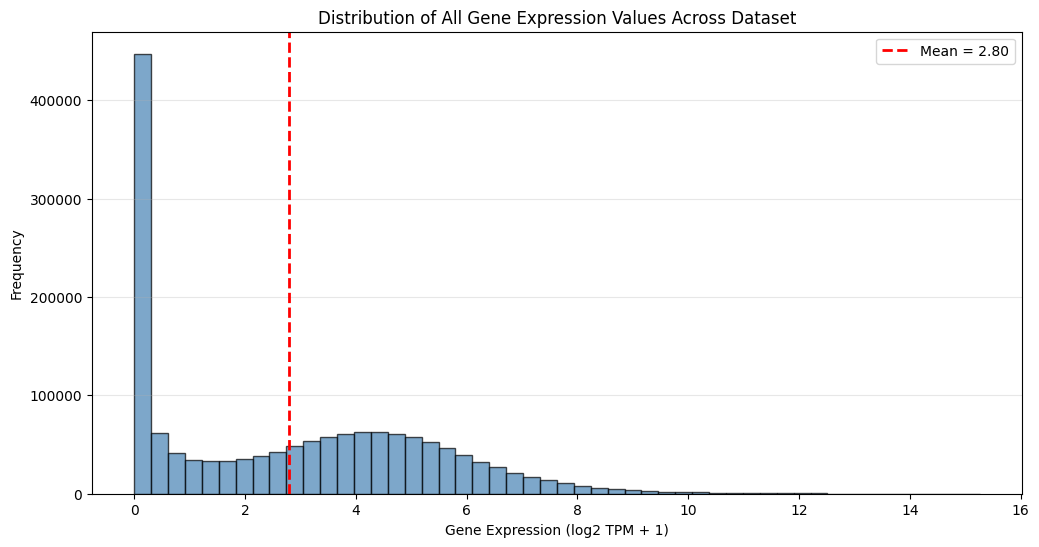

In [23]:
# Create histogram of all expression values
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(all_expression, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Gene Expression (log2 TPM + 1)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of All Gene Expression Values Across Dataset')
ax.axvline(all_expression.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {all_expression.mean():.2f}')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.show()

**Biological insights:**
- Most genes have very low to moderate expression or are not expressed at all.
- The distribution is roughly normal (bell-shaped)
- There's a long tail on the right (some genes are very highly expressed)

### Density Plot of All Values

Let's also create a smooth density plot:

In [ ]:
# Density plot of all expression values
fig, ax = plt.subplots(figsize=(12, 6))
pd.Series(all_expression).plot(kind='density', linewidth=2, color='steelblue', ax=ax)
ax.set_xlabel('Gene Expression (log2 TPM + 1)')
ax.set_ylabel('Density')
ax.set_title('Density Plot of All Gene Expression Values')
ax.axvline(all_expression.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {all_expression.mean():.2f}')
ax.legend()
ax.grid(alpha=0.3)
plt.show()

### 📊 Exercise 7: Compare Breast vs Myeloid Overall Distributions

Create two separate flattened arrays:
1. All gene expression values from Breast cancer cell lines
2. All gene expression values from Myeloid cancer cell lines

Then plot overlaid density plots to compare the overall expression patterns.

**Hint:** Filter by lineage first, then select numeric columns and flatten

In [ ]:
# Your code here:


### 📊 Exercise 8: Top Expressed Genes

Find the top 5 most highly expressed genes (by mean expression) and create overlaid density plots for all 5.

**Hints:**
1. Calculate mean for each gene: `numeric_df.mean()`
2. Sort and get top 5: `.sort_values(ascending=False).head(5)`
3. Plot each gene's distribution with a loop

In [ ]:
# Your code here:


---

## 7. Key Takeaways

✅ **Histograms** show the distribution of numerical data using bins

✅ **Overlaying histograms** allows comparison of multiple distributions
   - Use `alpha` for transparency
   - Use `label` and `legend()` to identify each distribution

✅ **Density plots (KDE)** provide smooth distribution curves
   - Better for comparisons
   - Not affected by bin size choices

✅ **Flattening data** with `.values.flatten()` creates 1D arrays
   - Useful for viewing overall distributions
   - Use `select_dtypes(include='number')` to filter numeric columns

✅ **Biological applications:**
   - Compare gene expression patterns
   - Identify typical expression ranges
   - Detect outliers or unusual distributions
   - Compare expression patterns between cancer types

---

## 🎯 Challenge: Explore on Your Own

1. Create a figure with 4 subplots showing histograms of 4 different genes
2. Find genes with bimodal distributions (two peaks) - what might this mean biologically?
3. Compare the distribution shapes of housekeeping genes vs tissue-specific genes
4. Create a "before and after" plot showing expression distributions with and without outliers removed
5. Investigate if there's a relationship between mean expression and variability (std)

---

**Next:** In the next notebook, we'll explore more advanced visualization techniques including scatter plots and heatmaps! 📊